# TWEET DATA COLLECTION

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import time
import pandas as pd
import json
import csv
import preprocessor as p
import numpy as np

In [2]:
newtweet = pd.read_csv('vegan-tweets.csv')

In [3]:
newtweet.head()

,text
0,diwali glow edit out now all your fav brands i...
1,it has been and for long time heart disease an...
2,instead of thinking about what not to eat focu...
3,its world vegan day our sea view restaurants v...
4,let us deliver juice detox right to your door ...


In [4]:
newtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 1 columns):
text    9404 non-null object
dtypes: object(1)
memory usage: 74.3+ KB


# DATA CLEANING

In [5]:
# apply the first round of text cleaning techniques
import re
import string

def clean_text(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # remove triple dots
    text = re.sub("\.\.\.", "", text)
    
    # strip punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove leading and trailing whitespaces
    text = re.sub(r'^\s+|\s+$', '', text)
    
    # Remove numbers
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)

    # Converting to Lowercase
    text = text.lower()
    
    return text

round1 = lambda x: clean_text(x) 
newtweet.text = newtweet.text.astype(str)

# take a look at the updated text
tweets = pd.DataFrame(newtweet['text'].apply(round1))
tweets

,text
0,diwali glow edit out now all your fav brands i...
1,it has been and for long time heart disease an...
2,instead of thinking about what not to eat focu...
3,its world vegan day our sea view restaurants v...
4,let us deliver juice detox right to your door ...
...,...
9487,a vegan non voter and biracial wall into bar
9488,i ate worth of vegan tacos from and made an en...
9489,stress bought cheesecloth and citric acidready...
9490,you dont even eat that you vegan


In [6]:

nan_value = float("NaN")

#Convert NaN values to empty string
tweets.replace("", nan_value, inplace=True)
tweets.dropna(subset = ["text"], inplace=True)
tweets.reset_index(drop=True, inplace=True)
tweets = tweets.sort_index(ascending=False)
tweets.head()

,text
9491,sour cream and onion they re not vegan don tel...
9490,you dont even eat that you vegan
9489,stress bought cheesecloth and citric acidready...
9488,i ate worth of vegan tacos from and made an en...
9487,a vegan non voter and biracial wall into bar


In [7]:

tweets.shape

(9492, 1)

In [8]:

tweets.describe()

,text
count,9492
unique,8723
top,all about tea explo
freq,222


# WORD CLOUD AFTER "VEGAN" KEYWORD REMOVAL

In [10]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = nltk.corpus.stopwords.words('english')
#add words that aren't in the NLTK stopwords list
new_stopwords = ['vegan', 'amp']
stop_words.extend(new_stopwords)
print(len(stop_words))
print(stop_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
181
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 

In [11]:
def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = tweets["text"].size   #df
clean_description_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_description_lemmization.append(fix_Text2(tweets["text"][i])) #clean_

clean_description_lemmization[0:10]    ## clean_

['diwali glow edit fav brand one box november belle boxjust inrorder',
 'long time heart disease obesity related effect leadin',
 'instead thinking eat focus exploring wonderful thing eat great healt',
 'world day sea view restaurant special next day mouth wateringly good v',
 'let u deliver juice detox right door via deliveroo eat apps',
 'world day',
 'veganism dietary regime lifestyle lifestyle make world greener',
 'mean leaving everything matter happiness also',
 'happy world day',
 'happy']

In [12]:
len(clean_description_lemmization)

9492

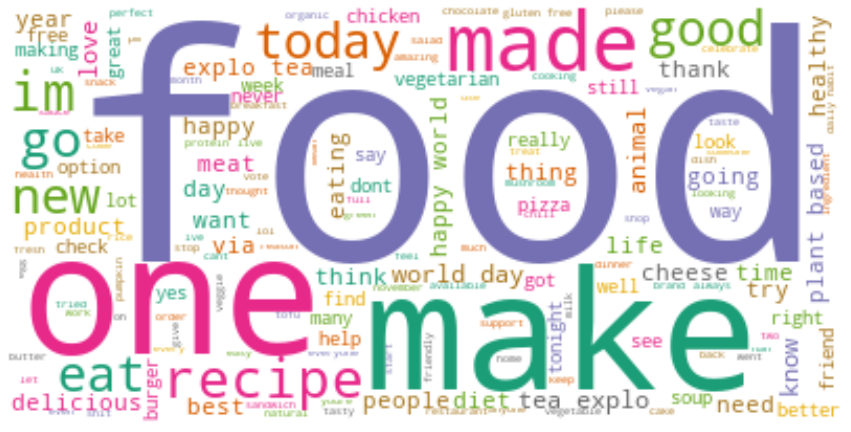

In [13]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# word cloud
text_wc = " ".join(item for item in clean_description_lemmization)    #clean_
wordcloud = WordCloud(background_color='white', colormap='Dark2', max_font_size=150, random_state=1).generate(text_wc)

plt.figure(figsize = (15, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_description_lemmization)
# transfer to an array
tv_array = tv_transform.toarray()
tv_transform.shape

(9492, 10711)

In [17]:

tv_df = pd.DataFrame(tv_array, columns=tv.get_feature_names())
tv_df.head()

,aaaah,aaah,aaayyy,aai,aamir,aannnd,aaris,ab,abali,abc,...,ziti,zombie,zone,zoo,zoom,zoonotic,zsazsa,zucchini,zuppa,zwift
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# WORD CLUSTERING

In [18]:
# insepct transformation
tv_sum=tweets.sum() #df
tv_sum.columns = ['importance']

In [19]:
tv_sum.sort_values(ascending=False).head(20)

text    sour cream and onion they re not vegan don tel...
dtype: object

In [20]:
from scipy.cluster.vq import kmeans,vq

# Unigram

In [21]:
tv=TfidfVectorizer(max_features=100)  # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_description_lemmization)

In [22]:
five_clusters=5
cluster_centers5,distortion5=kmeans(tv_transform.todense(),five_clusters)

tv5=TfidfVectorizer(max_features=100)  # 1.change # of features 2.maybe min_df
tv5_transform=tv5.fit_transform(clean_description_lemmization)

terms5=tv5.get_feature_names()
for i in range(five_clusters):
    center_terms=dict(zip(terms5,list(cluster_centers5[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['day', 'happy', 'world', 'one', 'today']
['tea', 'explo', 'make', 'rice', 'also']
['plant', 'based', 'diet', 'food', 'new']
['food', 'healthy', 'eat', 'delicious', 'make']
['go', 'like', 'make', 'im', 'get']


In [25]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df

tv_sum.sort_values(ascending=False).head(20)

day       294.611819
food      260.752518
like      226.947177
happy     226.901155
go        221.951328
make      217.095390
world     211.435859
one       209.910285
im        199.336060
get       197.939339
good      190.437291
made      186.734681
recipe    184.368225
tea       180.782017
today     175.212687
free      172.563699
new       169.890511
eat       167.793358
explo     159.404299
animal    159.100137
dtype: float64

In [27]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[:15]

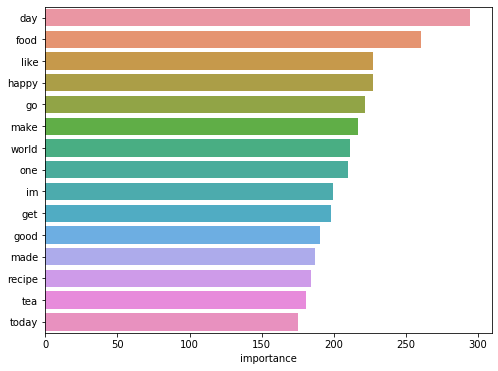

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_sum.importance, y=df_sum.index, orient ='h', label='importance')

In [29]:
tv_bi5=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_bi5_transform=tv_bi5.fit_transform(clean_description_lemmization)

terms_bi5=tv_bi5.get_feature_names()

for i in range(five_clusters):
    center_terms=dict(zip(terms_bi5,list(cluster_centers5[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['chicken nugget', 'first day', 'world day', 'link get', 'stir fry']
['pretty good', 'day celebrate', 'health benefit', 'non dairy', 'added closet']
['make sure', 'bar soap', 'christmas gift', 'dont like', 'let make']
['dont like', 'flap jack', 'costa owns', 'chocolate chip', 'health benefit']
['election day', 'habit compatible', 'health benefit', 'given charity', 'eat meat']


In [31]:
columns=tv_bi5.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_bi5_transform.toarray(),columns=columns) #df_
# insepct transformation
binigram_tv_sum=df_description.sum() #df

In [24]:
tv_ub5=TfidfVectorizer(max_features=100,ngram_range=(1,2)) 
tvub5_transform=tv_ub5.fit_transform(clean_description_lemmization)

five_clusters=5 # change the # of clusters
cluster_centers5ub,distortiontub=kmeans(tvub5_transform.todense(),five_clusters)

terms_ub5=tv_ub5.get_feature_names()
for i in range(five_clusters):
    center_terms=dict(zip(terms_ub5,list(cluster_centers5ub[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:7])

['food', 'make', 'get', 'im', 'good', 'one', 'made']
['butter', 'chocolate', 'make', 'made', 'cream', 'easy', 'cheese']
['go', 'meat', 'egg', 'animal', 'today', 'take', 'one']
['like', 'dont', 'would', 'food', 'im', 'meat', 'look']
['day', 'happy', 'world', 'world day', 'happy world', 'one', 'today']


In [33]:
df_bi_sum=pd.DataFrame(binigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[:15]

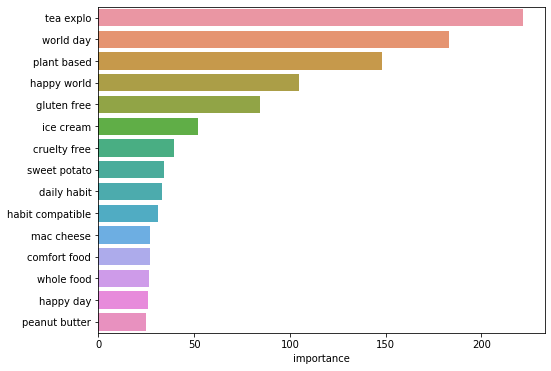

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_bi_sum.importance, y=df_bi_sum.index, orient ='h', label='importance')

In [36]:
columns=tv_ub5.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tvub5_transform.toarray(),columns=columns) #df_
# insepct transformation
ub_tv_sum=df_description.sum() #df

In [38]:
df_ub_sum=pd.DataFrame(ub_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[:15]

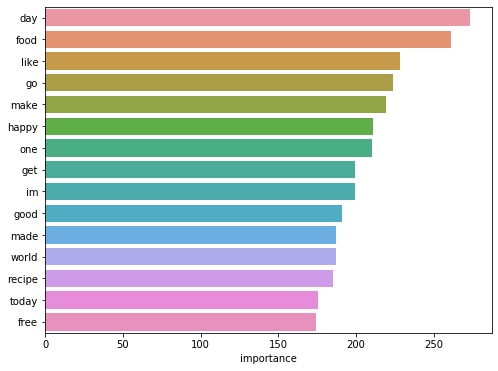

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_ub_sum.importance, y=df_ub_sum.index, orient ='h', label='importance')

In [26]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tweets['Subjectivity'] = tweets['text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweets

,text,Subjectivity,Polarity
9491,sour cream and onion they re not vegan don tel...,0.100000,-0.150000
9490,you dont even eat that you vegan,0.000000,0.000000
9489,stress bought cheesecloth and citric acidready...,0.000000,0.000000
9488,i ate worth of vegan tacos from and made an en...,0.362500,0.150000
9487,a vegan non voter and biracial wall into bar,0.000000,0.000000
...,...,...,...
4,let us deliver juice detox right to your door ...,0.535714,0.285714
3,its world vegan day our sea view restaurants v...,0.317857,0.214286
2,instead of thinking about what not to eat focu...,0.875000,0.900000
1,it has been and for long time heart disease an...,0.400000,-0.025000


In [27]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Analysis'] = tweets.Polarity.apply(getAnalysis)

tweets

,text,Subjectivity,Polarity,Analysis
9491,sour cream and onion they re not vegan don tel...,0.100000,-0.150000,Negative
9490,you dont even eat that you vegan,0.000000,0.000000,Neutral
9489,stress bought cheesecloth and citric acidready...,0.000000,0.000000,Neutral
9488,i ate worth of vegan tacos from and made an en...,0.362500,0.150000,Positive
9487,a vegan non voter and biracial wall into bar,0.000000,0.000000,Neutral
...,...,...,...,...
4,let us deliver juice detox right to your door ...,0.535714,0.285714,Positive
3,its world vegan day our sea view restaurants v...,0.317857,0.214286,Positive
2,instead of thinking about what not to eat focu...,0.875000,0.900000,Positive
1,it has been and for long time heart disease an...,0.400000,-0.025000,Negative


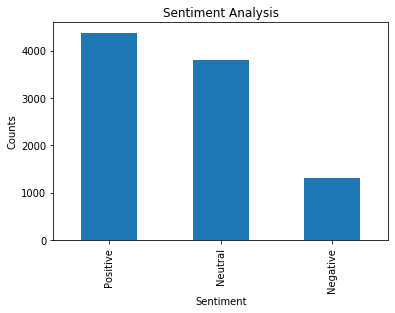

In [28]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [29]:
# print all positive tweets
print('Positive tweets:\n')
j=1
sortedDf = tweets.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == 'Positive'):
        print(str(j) + '. ' + sortedDf['text'][i])
        print()
        j+=1

Positive tweets:

1. instead of thinking about what not to eat focus on exploring all the wonderful things you can eat for great healt

2. its world vegan day our sea view restaurants vegan special over the next few days is mouth wateringly good v

3. let us deliver juice detox right to your door via the deliveroo or just eat apps

4. being vegan does not mean you re leaving everything it matter of happiness also

5. happy world vegan day

6. happy

7. it we re also celebrating years of the trademark the first vegan labelling

8. isnt joaquin beautiful yeees like the beautiful yall are

9. the resistance amp released our th single we are the resistance amp the video to go with it enjoy please support

10. as long as it cake happy

11. vegan day is yours enjoy it as you can see nowhere else today is world vegan day

12. wishing everybody happy

13. happy world vegan day folks because dont have any beef with you but will have some on my plate tonigh

14. from monthly meal plan roasted on

In [30]:
# print all positive tweets
print('Negative tweets:\n')
j=1
sortedDf = tweets.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == 'Negative'):
        print(str(j) + '. ' + sortedDf['text'][i])
        print()
        j+=1

Negative tweets:

1. it has been and for long time heart disease and obesity related effects are the leadin

2. change starts with one one to change few few to change manyworld vegan day

3. dont be afraid of trying new things

4. did you know that some of our colours are uv reactive using spring green fluorescent glow

5. the pandemic which started on kansas chicken farm killed more in few months than the whole of wor

6. it world vegan dayconsuming fruits and vegetables of all kinds has long been associated with reduced risk of m

7. made some black chickpeas hummus with lemon juice amp sumac

8. looking for cosy sunday treat this tasty mac amp cheese is vegan so everyone can enjoy its cheesy goodnes

9. it but of course it should be world day everyday it not diet not something you go

10. green purple artpagina leuk gevonden minuten world vegan day be one less person harming animals

11. november is world vegan month month long celebration of all things vegan vegans often wonder if 